In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.rcParams['agg.path.chunksize'] = 100000
import sklearn
from scipy import stats
import datetime
from datetime import datetime
from datetime import timedelta
from datetime import date 
#from isoweek import Week
import math
import matplotlib as mpl
import os
import keyring
from sqlalchemy import create_engine
from sqlalchemy import text
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm
import psycopg2
plt.style.use('~/.matplotlib/stylelib/STV.mplstyle')

In [2]:
fleet = pd.read_csv('UK_fleet_landings.csv')

In [3]:
fleet.head()

,year,month,port_of_landing,port_nationality,vessel_nationality,length_group,gear_category,species_code,species_name,species,species_group,live_weight,landed_weight,value_gbp
0,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,BSS,Bass,Bass,Demersal,0.005,0.005,27.6
1,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,COD,Cod,Cod,Demersal,0.001,0.001,3.3
2,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.028,0.028,56.0
3,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.020,0.020,88.1
4,2015,1,Aberdeen,UK - Scotland,UK - Scotland,10m and under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.958,0.958,1279.8


In [4]:
fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672256 entries, 0 to 672255
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                672256 non-null  int64  
 1   month               672256 non-null  int64  
 2   port_of_landing     672256 non-null  object 
 3   port_nationality    672256 non-null  object 
 4   vessel_nationality  672256 non-null  object 
 5   length_group        672256 non-null  object 
 6   gear_category       672256 non-null  object 
 7   species_code        672256 non-null  object 
 8   species_name        672256 non-null  object 
 9   species             672256 non-null  object 
 10  species_group       672239 non-null  object 
 11  live_weight         672256 non-null  float64
 12  landed_weight       672256 non-null  float64
 13  value_gbp           672256 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 71.8+ MB


In [5]:
#removing null values

fleet = fleet.dropna()

In [6]:
fleet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672239 entries, 0 to 672255
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                672239 non-null  int64  
 1   month               672239 non-null  int64  
 2   port_of_landing     672239 non-null  object 
 3   port_nationality    672239 non-null  object 
 4   vessel_nationality  672239 non-null  object 
 5   length_group        672239 non-null  object 
 6   gear_category       672239 non-null  object 
 7   species_code        672239 non-null  object 
 8   species_name        672239 non-null  object 
 9   species             672239 non-null  object 
 10  species_group       672239 non-null  object 
 11  live_weight         672239 non-null  float64
 12  landed_weight       672239 non-null  float64
 13  value_gbp           672239 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 76.9+ MB


In [7]:
#creating month and year date column

fleet['month_year'] = fleet['month'].astype(str) + '/' + fleet['year'].astype(str)
fleet['date'] = fleet['month_year'].astype('datetime64')
#fleet = fleet.drop(['year','month'], axis=1)

In [8]:
fleet['relation_live_landed_weight'] = (fleet['live_weight'] /fleet['landed_weight']) -1
fleet = fleet.sort_values(by='date')
fleet.head()

,year,month,port_of_landing,port_nationality,vessel_nationality,length_group,gear_category,species_code,species_name,species,species_group,live_weight,landed_weight,value_gbp,month_year,date,relation_live_landed_weight
607247,2008,1,River Fowey,UK - England,UK - England,10m and under,Drift and fixed nets,-,-,Other demersal,Demersal,0.0300,0.0300,183.95,1/2008,2008-01-01,0.000000
606767,2008,1,Plymouth,UK - England,UK - England,Over 10m,Beam trawl,-,-,Brill,Demersal,0.8651,0.8243,6537.75,1/2008,2008-01-01,0.049497
606766,2008,1,Plymouth,UK - England,UK - England,Over 10m,Beam trawl,-,-,Bass,Demersal,0.0908,0.0908,776.19,1/2008,2008-01-01,0.000000
606765,2008,1,Plymouth,UK - England,UK - England,10m and under,Pots and traps,-,-,Other shellfish,Shellfish,0.0012,0.0012,1.20,1/2008,2008-01-01,0.000000
606764,2008,1,Plymouth,UK - England,UK - England,10m and under,Pots and traps,-,-,Lobsters,Shellfish,0.2300,0.2300,3450.00,1/2008,2008-01-01,0.000000


In [9]:
fleet = fleet[['year', 'month','month_year', 'date', 'port_of_landing', 'port_nationality',
       'vessel_nationality', 'length_group', 'gear_category', 'species_code',
       'species_name', 'species', 'species_group', 'live_weight',
       'landed_weight', 'relation_live_landed_weight','value_gbp']]

In [10]:
monthly_value = fleet.groupby(['date','month_year'])['live_weight','landed_weight'].sum()
monthly_value = monthly_value.reset_index()
monthly_value['relation_live_landed_weight'] = round((monthly_value['live_weight'] /monthly_value['landed_weight']) -1,2)
monthly_value

,date,month_year,live_weight,landed_weight,relation_live_landed_weight
0,2008-01-01,1/2008,99487.0209,97288.6298,0.02
1,2008-02-01,2/2008,71952.6146,68308.3436,0.05
2,2008-03-01,3/2008,60460.7078,56593.0118,0.07
3,2008-04-01,4/2008,62534.3280,57514.8603,0.09
4,2008-05-01,5/2008,46411.6786,40723.8482,0.14
...,...,...,...,...,...
91,2015-08-01,8/2015,80158.9870,76421.3070,0.05
92,2015-09-01,9/2015,67743.6590,63401.6790,0.07
93,2015-10-01,10/2015,97110.7040,94385.7060,0.03
94,2015-11-01,11/2015,102560.5010,99334.9160,0.03


In [11]:
year_value = fleet.groupby(['year'])['live_weight','landed_weight','value_gbp'].sum()
year_value = year_value.reset_index()
year_value['relation_live_landed_weight'] = round((year_value['live_weight'] /year_value['landed_weight']) -1,2)
year_value

,year,live_weight,landed_weight,value_gbp,relation_live_landed_weight
0,2008,715768.7354,663777.4949,7.155824e+08,0.08
1,2009,694375.4407,638542.3350,7.730460e+08,0.09
2,2010,716457.5481,671133.0623,8.245799e+08,0.07
3,2011,662817.5090,620584.5950,9.321838e+08,0.07
4,2012,724144.7890,682889.8610,8.845586e+08,0.06
5,2013,686772.4370,646105.5250,8.122405e+08,0.06
6,2014,830576.2010,787852.2280,9.394097e+08,0.05
7,2015,754119.4890,712773.6250,8.403473e+08,0.06


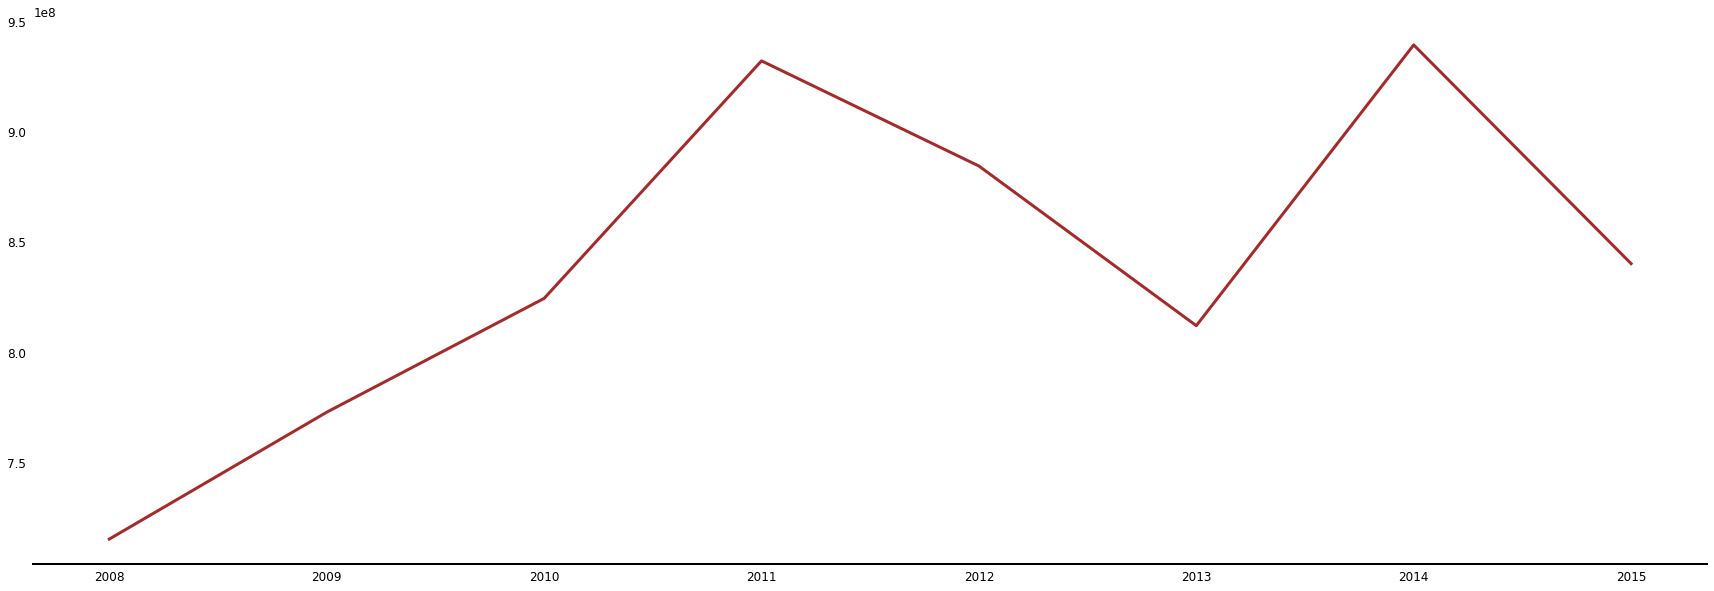

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.plot(year_value['year'],
year_value['value_gbp'],color='brown')


plt.show()

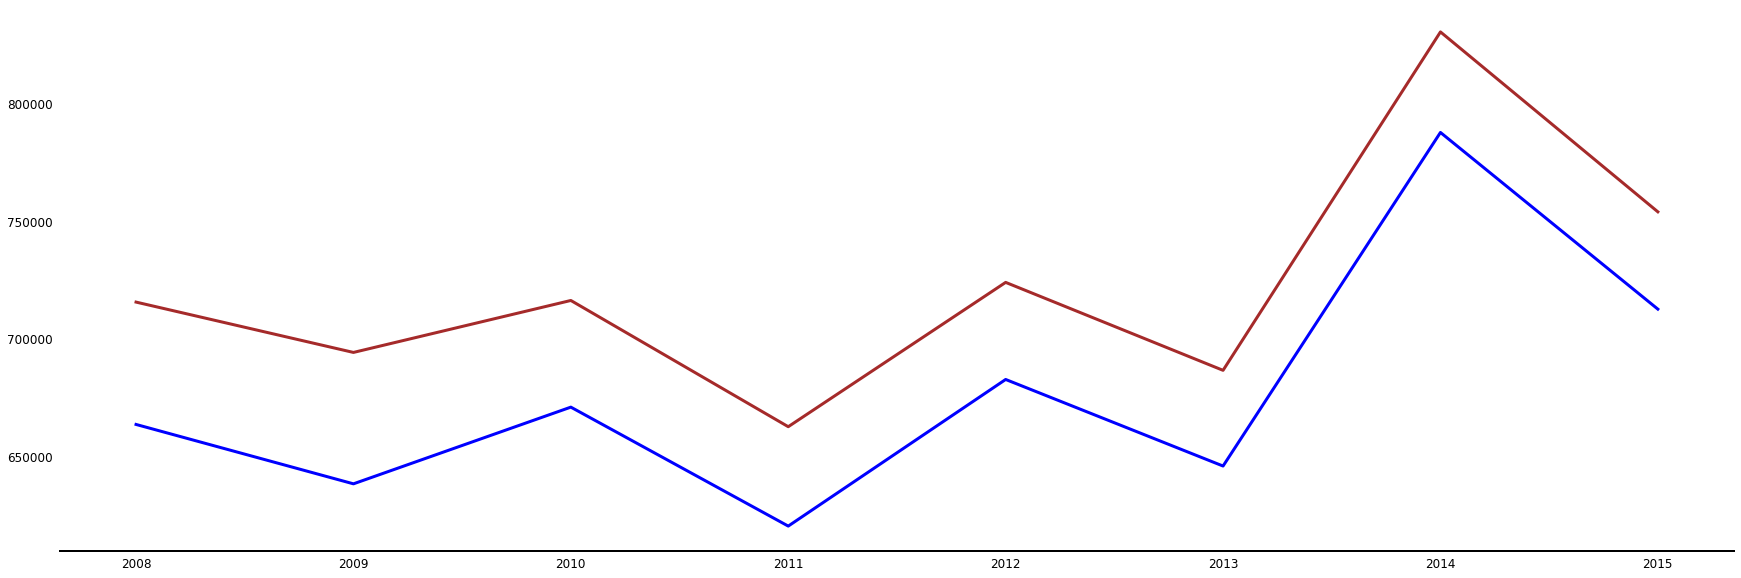

In [13]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.plot(year_value['year'],
year_value['live_weight'],color='brown')

ax.plot(year_value['year'],
year_value['landed_weight'],color='blue')


plt.show()

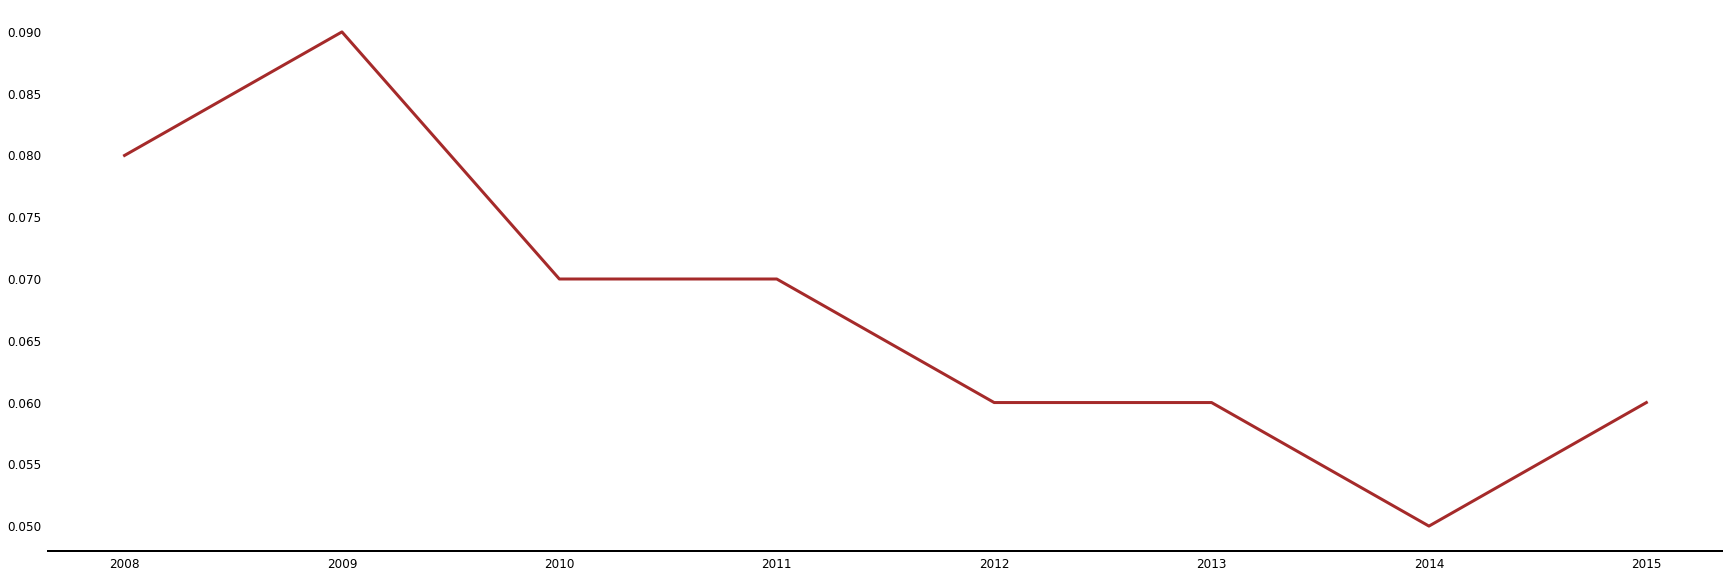

In [14]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.plot(year_value['year'],
year_value['relation_live_landed_weight'],color='brown')


plt.show()

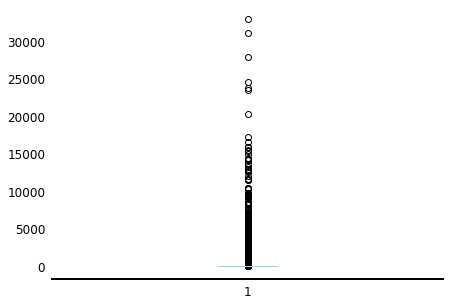

In [15]:
fig = plt.figure(figsize =(7, 5))
 
# Creating plot
plt.boxplot(fleet['live_weight'])

# show plot
plt.show()

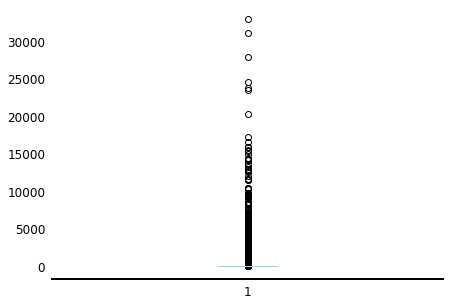

In [16]:
fig = plt.figure(figsize =(7, 5))
 
# Creating plot
plt.boxplot(fleet['landed_weight'])
# show plot
plt.show()

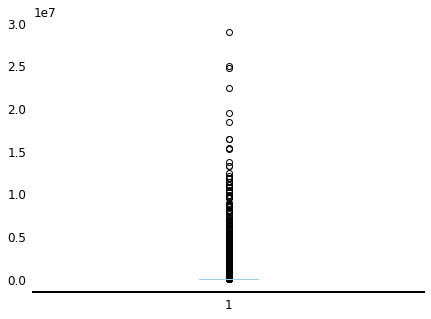

In [17]:
fig = plt.figure(figsize =(7, 5))
 
# Creating plot
plt.boxplot(fleet['value_gbp'])
# show plot
plt.show()

In [18]:
fleet.to_csv('fleet_clean_data', index=False)